In [1]:
# make sure images are oriented properly - might need to reach out to Randy Chase to answer this question.


In [47]:
import pickle
import xarray as xr
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bokeh.palettes import Turbo256 as palette
from datetime import datetime, timedelta


In [3]:
path_file = "/Users/ggantos/PycharmProjects/data/"
filename = "input_examples_20120413.nc"
data_xr = xr.open_dataset(path_file + filename)
data_xr


<xarray.Dataset>
Dimensions:                 (grid_column: 48, grid_row: 48, radar_field: 4, radar_height: 12, sounding_field: 7, sounding_height: 49, storm_object: 672, target_variable: 6)
Dimensions without coordinates: grid_column, grid_row, radar_field, radar_height, sounding_field, sounding_height, storm_object, target_variable
Data variables:
    full_storm_id_strings   (storm_object) |S35 ...
    radar_field_names       (radar_field) |S20 ...
    target_names            (target_variable) |S65 ...
    storm_times_unix_sec    (storm_object) int32 ...
    target_matrix           (storm_object, target_variable) int32 ...
    radar_heights_m_agl     (radar_height) int32 ...
    radar_image_matrix      (storm_object, grid_row, grid_column, radar_height, radar_field) float32 ...
    sounding_field_names    (sounding_field) |S37 ...
    sounding_heights_m_agl  (sounding_height) int32 ...
    sounding_matrix         (storm_object, sounding_height, sounding_field) float32 ...
Attributes:
    rotated_grids:                1
    rotated_grid_spacing_metres:  1500

In [4]:
# xyz and channel (for radar height, start with 1000)
data_xr['radar_image_matrix'].values.shape

(672, 48, 48, 12, 4)

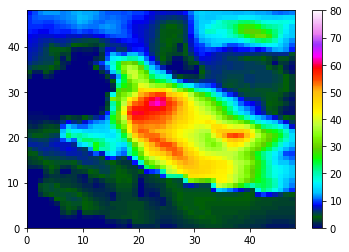

In [5]:
plt.pcolormesh(data_xr['radar_image_matrix'][0, :, :, 0, 0], vmin=0, vmax=80, cmap='gist_ncar')
plt.colorbar()


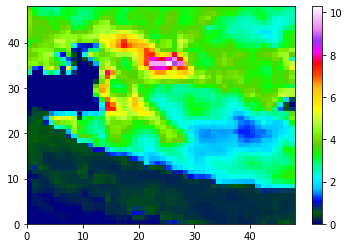

In [6]:
plt.pcolormesh(data_xr['radar_image_matrix'][0, :, :, 0, 1], cmap='gist_ncar')
plt.colorbar()


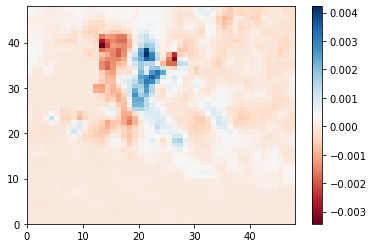

In [7]:
# vorticity

plt.pcolormesh(data_xr['radar_image_matrix'][0, :, :, 0, 2], cmap='RdBu')
plt.colorbar()


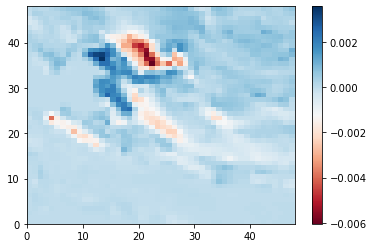

In [8]:
# divergence

plt.pcolormesh(data_xr['radar_image_matrix'][0, :, :, 0, 3], cmap='RdBu')
plt.colorbar()


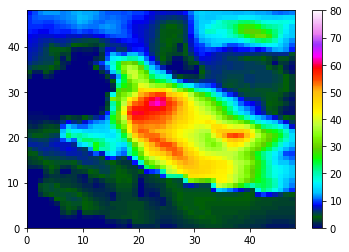

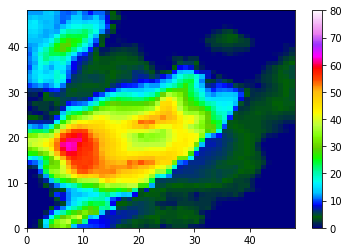

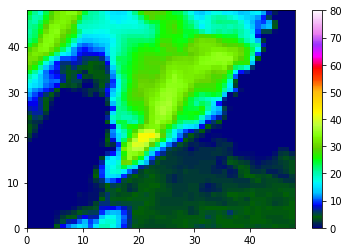

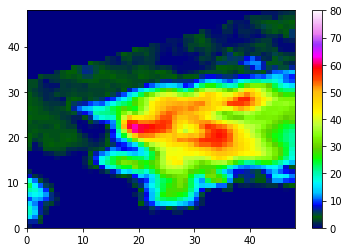

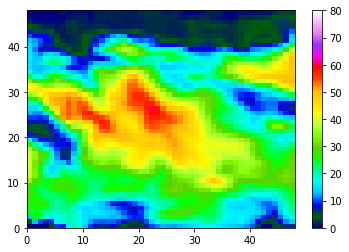

In [9]:

for i in range (5):
    plt.pcolormesh(data_xr['radar_image_matrix'][i, :, :, 0, 0], vmin=0, vmax=80, cmap='gist_ncar')
    plt.colorbar()
    plt.show()


In [10]:
filename = "tornado_labels_20120413.nc"
labels_xr = xr.open_dataset(path_file + filename)
labels_xr


<xarray.Dataset>
Dimensions:                                                            (storm_object: 704)
Dimensions without coordinates: storm_object
Data variables: (12/32)
    full_id_strings                                                    (storm_object) |S25 ...
    valid_times_unix_sec                                               (storm_object) int32 ...
    tornado_lead-time=0000-0900sec_distance=00000-30000m_min-fujita=0  (storm_object) float32 ...
    tornado_lead-time=0000-0900sec_distance=00000-30000m_min-fujita=2  (storm_object) float32 ...
    tornado_lead-time=0000-0900sec_distance=00000-20000m_min-fujita=0  (storm_object) float32 ...
    tornado_lead-time=0000-0900sec_distance=00000-20000m_min-fujita=2  (storm_object) float32 ...
    ...                                                                 ...
    tornado_lead-time=0000-3600sec_distance=00000-30000m_min-fujita=0  (storm_object) float32 ...
    tornado_lead-time=0000-3600sec_distance=00000-30000m_min-fujita=2  (storm_object) float32 ...
    tornado_lead-time=0000-3600sec_distance=00000-20000m_min-fujita=0  (storm_object) float32 ...
    tornado_lead-time=0000-3600sec_distance=00000-20000m_min-fujita=2  (storm_object) float32 ...
    tornado_lead-time=0000-3600sec_distance=00000-10000m_min-fujita=0  (storm_object) float32 ...
    tornado_lead-time=0000-3600sec_distance=00000-10000m_min-fujita=2  (storm_object) float32 ...

In [11]:
for k in data_xr.variables.keys():
    print(k, data_xr.variables[k].shape)

full_storm_id_strings (672,)
radar_field_names (4,)
target_names (6,)
storm_times_unix_sec (672,)
target_matrix (672, 6)
radar_heights_m_agl (12,)
radar_image_matrix (672, 48, 48, 12, 4)
sounding_field_names (7,)
sounding_heights_m_agl (49,)
sounding_matrix (672, 49, 7)


In [12]:
data_xr.full_storm_id_strings


<xarray.DataArray 'full_storm_id_strings' (storm_object: 672)>
array([b'133431840141_133431840173', b'133431840161_133431840197',
       b'133431840084_133431840063', ..., b'133431840103_133431840121',
       b'133431840103_133431840161', b'133431840103_133431840121'],
      dtype='|S35')
Dimensions without coordinates: storm_object

In [13]:
path_storms = "20120413/scale_314159265m2/"
filenames = [f for f in glob.glob(path_file + path_storms + "*.p")]
files = []
for filename in filenames:
    with open(filename, 'rb') as f:
        files.append(pickle.load(f))
data_full = pd.concat(files).sort_index()
data_full


,full_id_string,primary_id_string,secondary_id_string,first_prev_secondary_id_string,second_prev_secondary_id_string,first_next_secondary_id_string,second_next_secondary_id_string,valid_time_unix_sec,spc_date_string,tracking_start_time_unix_sec,...,centroid_latitude_deg,centroid_longitude_deg,east_velocity_m_s01,north_velocity_m_s01,grid_point_latitudes_deg,grid_point_longitudes_deg,grid_point_rows,grid_point_columns,polygon_object_latlng_deg,polygon_object_rowcol
0,133431840000_133431840000,133431840000,133431840000,,,133431840000,,1334343600,20120413,1334343600,...,35.011253,261.801973,9.513400,7.540149,"[35.037600000000005, 35.037600000000005, 35.03...","[261.69520000000006, 261.716, 261.7368, 261.75...","[94, 94, 94, 94, 94, 94, 94, 94, 95, 95, 95, 9...","[105, 106, 107, 108, 109, 110, 111, 112, 105, ...","POLYGON ((261.6848000000001 35.048, 261.684800...","POLYGON ((104.5 93.5, 104.5 95.5, 107.5 95.5, ..."
1,133431840001_133431840001,133431840001,133431840001,,,133431840001,,1334343600,20120413,1334343600,...,34.812960,260.836160,9.470541,6.841852,"[34.85040000000001, 34.85040000000001, 34.8296...","[260.80080000000004, 260.82160000000005, 260.8...","[103, 103, 104, 104, 104, 104, 104, 104, 105, ...","[62, 63, 62, 63, 64, 65, 66, 67, 61, 62, 63, 6...","POLYGON ((260.7904 34.8608, 260.7904 34.8192, ...","POLYGON ((61.5 102.5, 61.5 104.5, 60.5 104.5, ..."
2,133431840002_133431840002,133431840002,133431840002,,,133431840002,,1334343600,20120413,1334343600,...,34.705790,260.586857,9.468920,6.787100,"[34.7464, 34.7464, 34.72560000000001, 34.72560...","[260.55120000000005, 260.6344, 260.57200000000...","[108, 108, 109, 109, 109, 109, 109, 110, 110, ...","[50, 54, 51, 52, 53, 54, 55, 50, 51, 52, 53, 5...","POLYGON ((260.5408 34.75680000000001, 260.5408...","POLYGON ((49.5 107.5, 49.5 110.5, 48.5 110.5, ..."
3,133431840003_133431840003,133431840003,133431840003,,,133431840003,,1334343600,20120413,1334343600,...,35.040720,261.498640,9.444053,7.334638,"[35.07920000000001, 35.07920000000001, 35.0792...","[261.52880000000005, 261.54960000000005, 261.5...","[92, 92, 92, 93, 93, 93, 93, 93, 94, 94, 94, 9...","[97, 98, 99, 95, 96, 97, 98, 99, 93, 94, 95, 9...","POLYGON ((261.5184 35.0896, 261.5184 35.0688, ...","POLYGON ((96.5 91.5, 96.5 92.5, 94.5 92.5, 94...."
4,133431840124_133431840004,133431840124,133431840004,,,133431840004,,1334343600,20120413,1334343600,...,34.962200,261.593800,9.469083,7.380229,"[34.9752, 34.9752, 34.9752, 34.9752, 34.954400...","[261.5704, 261.5912, 261.612, 261.632800000000...","[97, 97, 97, 97, 98, 98, 98, 99]","[99, 100, 101, 102, 99, 100, 101, 99]","POLYGON ((261.5600000000001 34.98560000000001,...","POLYGON ((98.5 96.5, 98.5 99.5, 99.5 99.5, 99...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,133431840214_133431840272,133431840214,133431840272,133431840272,,,,1334386800,20120413,1334343600,...,35.626656,261.853280,13.734253,5.614519,"[35.6824, 35.66160000000001, 35.64080000000000...","[261.92400000000004, 261.92400000000004, 261.7...","[63, 64, 65, 65, 65, 65, 65, 65, 65, 65, 66, 6...","[116, 116, 110, 111, 112, 113, 114, 115, 116, ...","POLYGON ((261.9136 35.69280000000001, 261.9136...","POLYGON ((115.5 62.5, 115.5 64.5, 109.5 64.5, ..."
1736,133431840222_133431840282,133431840222,133431840282,133431840282,,,,1334386800,20120413,1334343600,...,35.876533,262.343467,8.544310,7.546488,"[35.9112, 35.9112, 35.9112, 35.89040000000001,...","[262.34000000000003, 262.36080000000004, 262.3...","[52, 52, 52, 53, 53, 53, 53, 53, 54, 54, 54, 5...","[136, 137, 138, 134, 135, 136, 137, 138, 134, ...","POLYGON ((262.3296 35.92160000000001, 262.3296...","POLYGON ((135.5 51.5, 135.5 52.5, 133.5 52.5, ..."
1737,133431840200_133431840258,133431840200,133431840258,133431840258,,,,1334386800,20120413,1334343600,...,35.797600,262.564000,2.686578,12.414929,"[35.828, 35.828, 35.828, 35.828, 35.828, 35.80...","[262.52720000000005, 262.54800000000006, 262.5...","[56, 56, 56, 56, 56,

In [14]:
data = data_full[['full_id_string', 'valid_time_unix_sec', 'spc_date_string','polygon_object_latlng_deg']]
data

,full_id_string,valid_time_unix_sec,spc_date_string,polygon_object_latlng_deg
0,133431840000_133431840000,1334343600,20120413,"POLYGON ((261.6848000000001 35.048, 261.684800..."
1,133431840001_133431840001,1334343600,20120413,"POLYGON ((260.7904 34.8608, 260.7904 34.8192, ..."
2,133431840002_133431840002,1334343600,20120413,"POLYGON ((260.5408 34.75680000000001, 260.5408..."
3,133431840003_133431840003,1334343600,20120413,"POLYGON ((261.5184 35.0896, 261.5184 35.0688, ..."
4,133431840124_133431840004,1334343600,20120413,"POLYGON ((261.5600000000001 34.98560000000001,..."
...,...,...,...,...
1735,133431840214_133431840272,1334386800,20120413,"POLYGON ((261.9136 35.69280000000001, 261.9136..."
1736,133431840222_133431840282,1334386800,20120413,"POLYGON ((262.3296 35.92160000000001, 262.3296..."
1737,133431840200_133431840258,1334386800,20120413,"POLYGON ((262.5168 35.83840000000001, 262.5168..."
1738,133431840221_133431840281,1334386800,20120413,"POLYGON ((261.2064 36.29600000000001, 261.2064..."


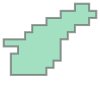

In [15]:
data.loc[data['full_id_string'] == '133431840141_133431840173', 'polygon_object_latlng_deg'][1025]

In [16]:
print(data.loc[data['full_id_string'] == '133431840141_133431840173', 'polygon_object_latlng_deg'][1025])

POLYGON ((260.2496 35.2976, 260.2496 35.2768, 260.208 35.2768, 260.208 35.25600000000001, 260.1664 35.25600000000001, 260.1664 35.23520000000001, 260.1248000000001 35.23520000000001, 260.1248000000001 35.2144, 260.104 35.2144, 260.104 35.1936, 260.0416 35.1936, 260.0416 35.1728, 260.0832 35.1728, 260.0832 35.152, 260.0624 35.152, 260.0624 35.0896, 260.1664 35.0896, 260.1664 35.11040000000001, 260.1872 35.11040000000001, 260.1872 35.13120000000001, 260.208 35.13120000000001, 260.208 35.1936, 260.2288 35.1936, 260.2288 35.2144, 260.2496 35.2144, 260.2496 35.23520000000001, 260.2912 35.23520000000001, 260.2912 35.25600000000001, 260.312 35.25600000000001, 260.312 35.2768, 260.2912 35.2768, 260.2912 35.2976, 260.2496 35.2976))


In [17]:
# reindex full_id_string by each given day
# "radar_image_matrix" == "reflectivity"

In [18]:
def lon_to_web_mercator(lon):
    k = 6378137
    return lon * (k * np.pi / 180.0)

def lat_to_web_mercator(lat):
    k = 6378137
    return np.log(np.tan(((90 + lat) * np.pi / 360.0))) * k


In [19]:
data

,full_id_string,valid_time_unix_sec,spc_date_string,polygon_object_latlng_deg
0,133431840000_133431840000,1334343600,20120413,"POLYGON ((261.6848000000001 35.048, 261.684800..."
1,133431840001_133431840001,1334343600,20120413,"POLYGON ((260.7904 34.8608, 260.7904 34.8192, ..."
2,133431840002_133431840002,1334343600,20120413,"POLYGON ((260.5408 34.75680000000001, 260.5408..."
3,133431840003_133431840003,1334343600,20120413,"POLYGON ((261.5184 35.0896, 261.5184 35.0688, ..."
4,133431840124_133431840004,1334343600,20120413,"POLYGON ((261.5600000000001 34.98560000000001,..."
...,...,...,...,...
1735,133431840214_133431840272,1334386800,20120413,"POLYGON ((261.9136 35.69280000000001, 261.9136..."
1736,133431840222_133431840282,1334386800,20120413,"POLYGON ((262.3296 35.92160000000001, 262.3296..."
1737,133431840200_133431840258,1334386800,20120413,"POLYGON ((262.5168 35.83840000000001, 262.5168..."
1738,133431840221_133431840281,1334386800,20120413,"POLYGON ((261.2064 36.29600000000001, 261.2064..."


In [20]:
xs = []
ys = []
for i in data.index:
    x, y = data.loc[i, 'polygon_object_latlng_deg'].exterior.coords.xy
    xs.append(lon_to_web_mercator(np.array(x) - 360))
    ys.append(lat_to_web_mercator(np.array(y)))
data['x'] = xs
data['y'] = ys
data

/Users/ggantos/miniconda3/envs/viz/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/ggantos/miniconda3/envs/viz/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,full_id_string,valid_time_unix_sec,spc_date_string,polygon_object_latlng_deg,x,y
0,133431840000_133431840000,1334343600,20120413,"POLYGON ((261.6848000000001 35.048, 261.684800...","[-10944398.001238845, -10944398.001238845, -10...","[4170406.0670579085, 4164750.912516358, 416475..."
1,133431840001_133431840001,1334343600,20120413,"POLYGON ((260.7904 34.8608, 260.7904 34.8192, ...","[-11043962.15380435, -11043962.15380435, -1104...","[4144980.4734124606, 4139338.209911597, 413933..."
2,133431840002_133431840002,1334343600,20120413,"POLYGON ((260.5408 34.75680000000001, 260.5408...","[-11071747.49870635, -11071747.49870635, -1107...","[4130880.1538311066, 4122428.4872350413, 41224..."
3,133431840003_133431840003,1334343600,20120413,"POLYGON ((261.5184 35.0896, 261.5184 35.0688, ...","[-10962921.564506847, -10962921.564506847, -10...","[4176064.1024901066, 4173234.72429281, 4173234..."
4,133431840124_133431840004,1334343600,20120413,"POLYGON ((261.5600000000001 34.98560000000001,...","[-10958290.673689844, -10958290.673689844, -10...","[4161924.4137321096, 4153449.222475777, 415344..."
...,...,...,...,...,...,...
1735,133431840214_133431840272,1334386800,20120413,"POLYGON ((261.9136 35.69280000000001, 261.9136...","[-10918928.101745347, -10918928.101745347, -10...","[4258433.042252094, 4252732.562183719, 4252732..."
1736,133431840222_133431840282,1334386800,20120413,"POLYGON ((262.3296 35.92160000000001, 262.3296...","[-10872619.193575345, -10872619.193575345, -10...","[4289839.008372963, 4286980.176124209, 4286980..."
1737,133431840200_133431840258,1334386800,20120413,"POLYGON ((262.5168 35.83840000000001, 262.5168...","[-10851780.184898842, -10851780.184898842, -10...","[4278408.183449211, 4275552.351346868, 4275552..."
1738,133431840221_133431840281,1334386800,20120413,"POLYGON ((261.2064 36.29600000000001, 261.2064...","[-10997653.245634349, -10997653.245634349, -10...","[4341427.326712588, 4338554.840209464, 4338554..."


In [21]:
data['valid_time'] = pd.to_datetime(data['valid_time_unix_sec'], unit='s')

/Users/ggantos/miniconda3/envs/viz/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data['valid_time'].unique()

array(['2012-04-13T19:00:00.000000000', '2012-04-13T19:05:00.000000000',
       '2012-04-13T19:10:00.000000000', '2012-04-13T19:15:00.000000000',
       '2012-04-13T19:20:00.000000000', '2012-04-13T19:25:00.000000000',
       '2012-04-13T19:30:00.000000000', '2012-04-13T19:35:00.000000000',
       '2012-04-13T19:40:00.000000000', '2012-04-13T19:45:00.000000000',
       '2012-04-13T19:50:00.000000000', '2012-04-13T19:55:00.000000000',
       '2012-04-13T20:00:00.000000000', '2012-04-13T20:05:00.000000000',
       '2012-04-13T20:10:00.000000000', '2012-04-13T20:15:00.000000000',
       '2012-04-13T20:20:00.000000000', '2012-04-13T20:25:00.000000000',
       '2012-04-13T20:30:00.000000000', '2012-04-13T20:35:00.000000000',
       '2012-04-13T20:40:00.000000000', '2012-04-13T20:45:00.000000000',
       '2012-04-13T20:50:00.000000000', '2012-04-13T20:55:00.000000000',
       '2012-04-13T21:00:00.000000000', '2012-04-13T21:05:00.000000000',
       '2012-04-13T21:10:00.000000000', '2012-04-13

In [23]:
type(data['valid_time'].unique())

numpy.ndarray

In [24]:
valid_time_menu = np.sort(data['valid_time'].unique())

In [25]:
valid_time_menu[1]

numpy.datetime64('2012-04-13T19:05:00.000000000')

In [26]:
5/60

0.08333333333333333

In [27]:
# gridpoint
# polygon

In [28]:
# to center the radar data
# pyproj
# select lon=something, lat=something

In [30]:
filenames = [f for f in glob.glob(path_file + "**/*.p", recursive=True)]
filenames

['/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-230000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-10-004000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-10-012000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-10-013500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-10-005500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-231500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-10-025500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-211500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-210

In [49]:
filenames

['/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-230000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-10-004000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-10-012000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-10-013500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-10-005500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-231500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-10-025500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-211500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-210

In [50]:
filenames.sort()

In [73]:
filenames

['/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-210000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-210500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-211000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-211500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-212000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-212500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-213000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-213500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-214

In [116]:
filenames[0].split("20")[0] + datetime_min.strftime("%Y%m%d") + "/scale_314159265m2/storm-tracking_segmotion_"



'/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_'

In [107]:
"/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-14-221500.p"
"/Users/ggantos/PycharmProjects/data/20120414/scale_314159265m2/storm-tracking_segmotion_2012-04-14-221500.p"

False

In [38]:
datetimes = [datetime.strptime(f.split('segmotion_')[1].split('.')[0], '%Y-%m-%d-%H%M%S') for f in filenames]
datetimes[-1]


datetime.datetime(2012, 4, 13, 23, 45)

In [125]:
datetime.strptime("4/13/2012 - 12Z", "%m/%d/%Y - %HZ")

datetime.datetime(2012, 4, 13, 12, 0)

In [122]:
"4/13/2012 - 12Z".split(" ")[0]

'4/13/2012'

In [95]:
datetimes

[datetime.datetime(2012, 4, 9, 23, 0),
 datetime.datetime(2012, 4, 10, 0, 40),
 datetime.datetime(2012, 4, 10, 1, 20),
 datetime.datetime(2012, 4, 10, 1, 35),
 datetime.datetime(2012, 4, 10, 0, 55),
 datetime.datetime(2012, 4, 9, 23, 15),
 datetime.datetime(2012, 4, 10, 2, 55),
 datetime.datetime(2012, 4, 9, 21, 15),
 datetime.datetime(2012, 4, 9, 21, 0),
 datetime.datetime(2012, 4, 10, 2, 40),
 datetime.datetime(2012, 4, 10, 2, 50),
 datetime.datetime(2012, 4, 9, 21, 10),
 datetime.datetime(2012, 4, 9, 21, 5),
 datetime.datetime(2012, 4, 10, 2, 45),
 datetime.datetime(2012, 4, 9, 23, 5),
 datetime.datetime(2012, 4, 10, 0, 45),
 datetime.datetime(2012, 4, 10, 1, 25),
 datetime.datetime(2012, 4, 10, 1, 30),
 datetime.datetime(2012, 4, 10, 0, 50),
 datetime.datetime(2012, 4, 9, 23, 10),
 datetime.datetime(2012, 4, 10, 2, 35),
 datetime.datetime(2012, 4, 10, 2, 20),
 datetime.datetime(2012, 4, 10, 0, 20),
 datetime.datetime(2012, 4, 10, 1, 40),
 datetime.datetime(2012, 4, 9, 22, 0),
 date

In [106]:
dates_12Z = []
for d in datetimes:
    date = datetime(year=d.year, month=d.month, day=d.day, hour=12)
    if d.hour >= 12:
        dates_12Z.append(date)
    if d.hour < 12:
        dates_12Z.append(date - timedelta(days=1))
print(len(dates_12Z))
dates_12Z = np.unique(dates_12Z)
print(len(dates_12Z))

411
3


In [84]:
filenames[0].split('_20')[0] + "_" + datetime_min.strftime("%Y-%m-%d-%H%M%S")+'.p'

'/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-120000.p'

In [92]:
filenames[0].split('_2')[0]

'/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion'

In [39]:
datetimes[-1].year

2012

In [61]:
24*60//5

288

In [64]:
datetime_min + timedelta(minutes=5)

datetime.datetime(2012, 4, 13, 12, 5)

In [74]:
'/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_2012-04-09-210000.p'
'/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-210000.p'

False

In [93]:
filenames_24hr = [filenames[0].split('_2')[0] + "_" + (datetime_min + timedelta(minutes=5)*i).strftime("%Y-%m-%d-%H%M%S")+'.p' for i in range(24*60//5)]
filenames_24hr


['/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-120000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-120500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-121000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-121500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-122000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-122500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-123000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-123500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-124

In [94]:
set(filenames).intersection(filenames_24hr)

{'/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-210000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-210500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-211000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-211500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-212000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-212500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-213000.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-213500.p',
 '/Users/ggantos/PycharmProjects/data/20120409/scale_314159265m2/storm-tracking_segmotion_2012-04-09-214

In [41]:
datetime(year=datetimes[-1].year, month=datetimes[-1].month, day=datetimes[-1].day, hour=12)

datetime.datetime(2012, 4, 13, 12, 0)

In [70]:
datetime_min = datetime(year=datetimes[0].year, month=datetimes[0].month, day=datetimes[0].day, hour=12)
datetime_max = datetime_min + timedelta(days=1)
print(datetime_min, datetime_max)


2012-04-09 12:00:00 2012-04-10 12:00:00


In [43]:
datetime_min.strftime("%Y-%m-%d-%H%M%S")

'2012-04-13-120000'

In [ ]:
filenames_24hr = [f for f in glob.glob(path_file + f"**/*_{}.p", recursive=True)]
filenames_24hr

In [14]:
filenames[0].split('segmotion_')[1].split('.')[0]

'2012-04-09-230000'

In [22]:
from datetime import datetime

datetime_object = datetime.strptime(filenames[0].split('segmotion_')[1].split('.')[0], '%Y-%m-%d-%H%M%S')
datetime_object


datetime.datetime(2012, 4, 9, 23, 0)

In [23]:
type(datetime_object)

datetime.datetime

In [24]:
filenames[0].split('segmotion_')[1].split('.')[0]

'2012-04-09-230000'

In [16]:
data

,full_id_string,primary_id_string,secondary_id_string,first_prev_secondary_id_string,second_prev_secondary_id_string,first_next_secondary_id_string,second_next_secondary_id_string,valid_time_unix_sec,spc_date_string,tracking_start_time_unix_sec,...,centroid_latitude_deg,centroid_longitude_deg,east_velocity_m_s01,north_velocity_m_s01,grid_point_latitudes_deg,grid_point_longitudes_deg,grid_point_rows,grid_point_columns,polygon_object_latlng_deg,polygon_object_rowcol
173,133397280028_133397280007,133397280028,133397280007,133397280007,,133397280007,,1334012400,20120409,1334005200,...,35.027850,259.599113,5.220624,5.006482,"[35.18320000000001, 35.18320000000001, 35.1832...","[259.65680000000003, 259.67760000000004, 259.6...","[111, 111, 111, 111, 112, 112, 112, 112, 112, ...","[31, 32, 33, 34, 30, 31, 32, 33, 34, 35, 29, 3...","POLYGON ((259.6464 35.1936, 259.6464 35.1728, ...","POLYGON ((30.5 110.5, 30.5 111.5, 29.5 111.5, ..."
174,133397280027_133397280014,133397280027,133397280014,133397280014,,133397280014,,1334012400,20120409,1334005200,...,36.567154,260.537333,5.947952,5.593887,"[36.660000000000004, 36.660000000000004, 36.66...","[260.57200000000006, 260.5928, 260.6136, 260.6...","[40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 4...","[75, 76, 77, 78, 73, 74, 75, 76, 77, 78, 72, 7...","POLYGON ((260.5616000000001 36.67040000000001,...","POLYGON ((74.5 39.5, 74.5 40.5, 72.5 40.5, 72...."
175,133397280001_133397280001,133397280001,133397280001,133397280001,,133397280001,,1334012400,20120409,1334005200,...,36.291651,260.814604,2.660819,4.065735,"[36.3896, 36.3896, 36.36880000000001, 36.36880...","[260.80080000000004, 260.82160000000005, 260.6...","[53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 5...","[86, 87, 80, 81, 82, 83, 84, 85, 86, 87, 88, 8...","POLYGON ((260.7904 36.40000000000001, 260.7904...","POLYGON ((85.5 52.5, 85.5 53.5, 79.5 53.5, 79...."
176,133397280027_133397280000,133397280027,133397280000,133397280000,,133397280000,,1334012400,20120409,1334005200,...,36.535714,260.722736,2.360059,4.249906,"[36.660000000000004, 36.6392, 36.6184, 36.6184...","[260.65520000000004, 260.65520000000004, 260.6...","[40, 41, 42, 42, 42, 42, 43, 43, 43, 43, 43, 4...","[79, 79, 79, 80, 81, 82, 78, 79, 80, 81, 82, 8...","POLYGON ((260.6448 36.67040000000001, 260.6448...","POLYGON ((78.5 39.5, 78.5 42.5, 77.5 42.5, 77...."
177,133397280003_133397280003,133397280003,133397280003,133397280003,,133397280003,,1334012400,20120409,1334005200,...,35.262933,260.015022,5.423381,1.892531,"[35.30800000000001, 35.30800000000001, 35.2872...","[259.96880000000004, 259.98960000000005, 259.9...","[105, 105, 106, 106, 106, 106, 107, 107, 107, ...","[46, 47, 46, 47, 48, 49, 46, 47, 48, 49, 50, 4...","POLYGON ((259.9584 35.3184, 259.9584 35.256000...","POLYGON ((45.5 104.5, 45.5 107.5, 47.5 107.5, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,133431840113_133431840133,133431840113,133431840133,,,133431840133,,1334360700,20120413,1334343600,...,34.975200,260.472894,8.120569,4.589101,"[35.037600000000005, 35.037600000000005, 35.03...","[260.4888, 260.50960000000003, 260.53040000000...","[94, 94, 94, 95, 95, 96, 96, 97, 97, 98, 98, 9...","[47, 48, 49, 47, 48, 46, 47, 45, 46, 44, 45, 4...","POLYGON ((260.4784 35.048, 260.4784 35.0064000...","POLYGON ((46.5 93.5, 46.5 95.5, 45.5 95.5, 45...."
691,133431840119_133431840139,133431840119,133431840139,133431840139,,133431840139,,1334360700,20120413,1334343600,...,36.602222,261.729867,11.998605,6.240618,"[36.6184, 36.6184, 36.6184, 36.59760000000001,...","[261.716, 261.7576, 261.77840000000003, 261.67...","[18, 18, 18, 19, 19, 19, 19, 19, 20]","[106, 108, 109, 104, 105, 106, 107, 108, 107]","POLYGON ((261.7056 36.62880000000001, 261.7056...","POLYGON ((105.5 17.5, 105.5 18.5, 103.5 18.5, ..."
692,133431840114_133431840134,133431840114,133431840134,133431840134,,133431840134,,1334360700,20120413,1334343600,...,36.655840,261.857440,4.341292,6.155186,"[36.680800000000005, 3

In [26]:
data.shape

(6609, 24)

In [31]:
files = []
for filename in filenames:
    with open(filename, 'rb') as f:
        df = pickle.load(f)
        run_time = datetime.strptime(filename.split('segmotion_')[1].split('.')[0], '%Y-%m-%d-%H%M%S')
        df['run_time'] = [run_time] * df.shape[0]
        files.append(df)
data = pd.concat(files)


In [32]:
data


,full_id_string,primary_id_string,secondary_id_string,first_prev_secondary_id_string,second_prev_secondary_id_string,first_next_secondary_id_string,second_next_secondary_id_string,valid_time_unix_sec,spc_date_string,tracking_start_time_unix_sec,...,centroid_longitude_deg,east_velocity_m_s01,north_velocity_m_s01,grid_point_latitudes_deg,grid_point_longitudes_deg,grid_point_rows,grid_point_columns,polygon_object_latlng_deg,polygon_object_rowcol,run_time
173,133397280028_133397280007,133397280028,133397280007,133397280007,,133397280007,,1334012400,20120409,1334005200,...,259.599113,5.220624,5.006482,"[35.18320000000001, 35.18320000000001, 35.1832...","[259.65680000000003, 259.67760000000004, 259.6...","[111, 111, 111, 111, 112, 112, 112, 112, 112, ...","[31, 32, 33, 34, 30, 31, 32, 33, 34, 35, 29, 3...","POLYGON ((259.6464 35.1936, 259.6464 35.1728, ...","POLYGON ((30.5 110.5, 30.5 111.5, 29.5 111.5, ...",2012-04-09 23:00:00
174,133397280027_133397280014,133397280027,133397280014,133397280014,,133397280014,,1334012400,20120409,1334005200,...,260.537333,5.947952,5.593887,"[36.660000000000004, 36.660000000000004, 36.66...","[260.57200000000006, 260.5928, 260.6136, 260.6...","[40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 4...","[75, 76, 77, 78, 73, 74, 75, 76, 77, 78, 72, 7...","POLYGON ((260.5616000000001 36.67040000000001,...","POLYGON ((74.5 39.5, 74.5 40.5, 72.5 40.5, 72....",2012-04-09 23:00:00
175,133397280001_133397280001,133397280001,133397280001,133397280001,,133397280001,,1334012400,20120409,1334005200,...,260.814604,2.660819,4.065735,"[36.3896, 36.3896, 36.36880000000001, 36.36880...","[260.80080000000004, 260.82160000000005, 260.6...","[53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 5...","[86, 87, 80, 81, 82, 83, 84, 85, 86, 87, 88, 8...","POLYGON ((260.7904 36.40000000000001, 260.7904...","POLYGON ((85.5 52.5, 85.5 53.5, 79.5 53.5, 79....",2012-04-09 23:00:00
176,133397280027_133397280000,133397280027,133397280000,133397280000,,133397280000,,1334012400,20120409,1334005200,...,260.722736,2.360059,4.249906,"[36.660000000000004, 36.6392, 36.6184, 36.6184...","[260.65520000000004, 260.65520000000004, 260.6...","[40, 41, 42, 42, 42, 42, 43, 43, 43, 43, 43, 4...","[79, 79, 79, 80, 81, 82, 78, 79, 80, 81, 82, 8...","POLYGON ((260.6448 36.67040000000001, 260.6448...","POLYGON ((78.5 39.5, 78.5 42.5, 77.5 42.5, 77....",2012-04-09 23:00:00
177,133397280003_133397280003,133397280003,133397280003,133397280003,,133397280003,,1334012400,20120409,1334005200,...,260.015022,5.423381,1.892531,"[35.30800000000001, 35.30800000000001, 35.2872...","[259.96880000000004, 259.98960000000005, 259.9...","[105, 105, 106, 106, 106, 106, 107, 107, 107, ...","[46, 47, 46, 47, 48, 49, 46, 47, 48, 49, 50, 4...","POLYGON ((259.9584 35.3184, 259.9584 35.256000...","POLYGON ((45.5 104.5, 45.5 107.5, 47.5 107.5, ...",2012-04-09 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,133431840113_133431840133,133431840113,133431840133,,,133431840133,,1334360700,20120413,1334343600,...,260.472894,8.120569,4.589101,"[35.037600000000005, 35.037600000000005, 35.03...","[260.4888, 260.50960000000003, 260.53040000000...","[94, 94, 94, 95, 95, 96, 96, 97, 97, 98, 98, 9...","[47, 48, 49, 47, 48, 46, 47, 45, 46, 44, 45, 4...","POLYGON ((260.4784 35.048, 260.4784 35.0064000...","POLYGON ((46.5 93.5, 46.5 95.5, 45.5 95.5, 45....",2012-04-13 23:45:00
691,133431840119_133431840139,133431840119,133431840139,133431840139,,133431840139,,1334360700,20120413,1334343600,...,261.729867,11.998605,6.240618,"[36.6184, 36.6184, 36.6184, 36.59760000000001,...","[261.716, 261.7576, 261.77840000000003, 261.67...","[18, 18, 18, 19, 19, 19, 19, 19, 20]","[106, 108, 109, 104, 105, 106, 107, 108, 107]","POLYGON ((261.7056 36.62880000000001, 261.7056...","POLYGON ((105.5 17.5, 105.5 18.5, 103.5 18.5, ...",2012-04-13 23:45:00
692,133431840114_133431840134,133431840114,133431840134,133431840134,,133431840134,,1334360700,20120413,1334343600,...,261.8

In [33]:
data.columns

Index(['full_id_string', 'primary_id_string', 'secondary_id_string',
       'first_prev_secondary_id_string', 'second_prev_secondary_id_string',
       'first_next_secondary_id_string', 'second_next_secondary_id_string',
       'valid_time_unix_sec', 'spc_date_string',
       'tracking_start_time_unix_sec', 'tracking_end_time_unix_sec',
       'cell_start_time_unix_sec', 'cell_end_time_unix_sec', 'age_seconds',
       'centroid_latitude_deg', 'centroid_longitude_deg',
       'east_velocity_m_s01', 'north_velocity_m_s01',
       'grid_point_latitudes_deg', 'grid_point_longitudes_deg',
       'grid_point_rows', 'grid_point_columns', 'polygon_object_latlng_deg',
       'polygon_object_rowcol', 'run_time'],
      dtype='object')

In [34]:
cols = ['full_id_string', 'run_time', 'valid_time_unix_sec','polygon_object_latlng_deg']

data = data[cols]


In [36]:
data = data.sort_values(by=['run_time', 'valid_time_unix_sec'])
data = data.reset_index(drop=True)


In [37]:
data

,full_id_string,run_time,valid_time_unix_sec,spc_date_string,polygon_object_latlng_deg
0,133397280027_133397280000,2012-04-09 21:00:00,1334005200,20120409,"POLYGON ((260.4784 36.85760000000001, 260.4784..."
1,133397280001_133397280001,2012-04-09 21:00:00,1334005200,20120409,"POLYGON ((260.312 36.608, 260.3328 36.608, 260..."
2,133397280002_133397280002,2012-04-09 21:00:00,1334005200,20120409,"POLYGON ((260.6448 36.98240000000001, 260.6448..."
3,133397280003_133397280003,2012-04-09 21:00:00,1334005200,20120409,"POLYGON ((259.3968 35.568, 259.3968 35.5264, 2..."
4,133397280027_133397280000,2012-04-09 21:05:00,1334005500,20120409,"POLYGON ((260.4992 36.85760000000001, 260.4992..."
...,...,...,...,...,...
6604,133440480622_133440480824,2012-04-15 07:00:00,1334473200,20120414,"POLYGON ((262.1632 39.08320000000001, 262.1632..."
6605,133440480648_133440480854,2012-04-15 07:00:00,1334473200,20120414,"POLYGON ((264.0768 40.04000000000001, 264.0768..."
6606,133440480633_133440480835,2012-04-15 07:00:00,1334473200,20120414,"POLYGON ((263.3904000000001 41.496, 263.390400..."
6607,133440480645_133440480851,2012-04-15 07:00:00,1334473200,20120414,"POLYGON ((262.8704 39.12480000000001, 262.8704..."


In [42]:
def lon_to_web_mercator(lon):
    k = 6378137
    return lon * (k * np.pi / 180.0)

def lat_to_web_mercator(lat):
    k = 6378137
    return np.log(np.tan((90 + lat) * np.pi / 360.0)) * k

In [43]:
xs = []
ys = []
for i in data.index:
    x, y = data.loc[i, 'polygon_object_latlng_deg'].exterior.coords.xy
    xs.append(lon_to_web_mercator(np.array(x) - 360))
    ys.append(lat_to_web_mercator(np.array(y)))
data['x'] = xs
data['y'] = ys

In [ ]:
# check whether or not the data is in UTC get it to 12Z to 12Z